In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import plotly_express as px

from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import warnings 
warnings.filterwarnings('ignore')

In [34]:
# Load the dataset
df = pd.read_csv("heart_failure_clinical_records_dataset.csv")


In [35]:
# Data cleaning and handling missing values
df.dropna(inplace=True)

In [40]:
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [42]:
df.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


In [43]:
px.imshow(df.corr(),title="Correlation Plot of the Heat Failure Prediction")

In [44]:
fig = px.histogram(df,x= 'DEATH_EVENT' , color='sex' , hover_data=df.columns , barmode='group')
fig.show()

In [45]:
fig = px.histogram(df , x='sex' , hover_data=df.columns ,color='sex' , title='sex ratio in data')
fig.show()


[]

<Figure size 1500x1000 with 0 Axes>

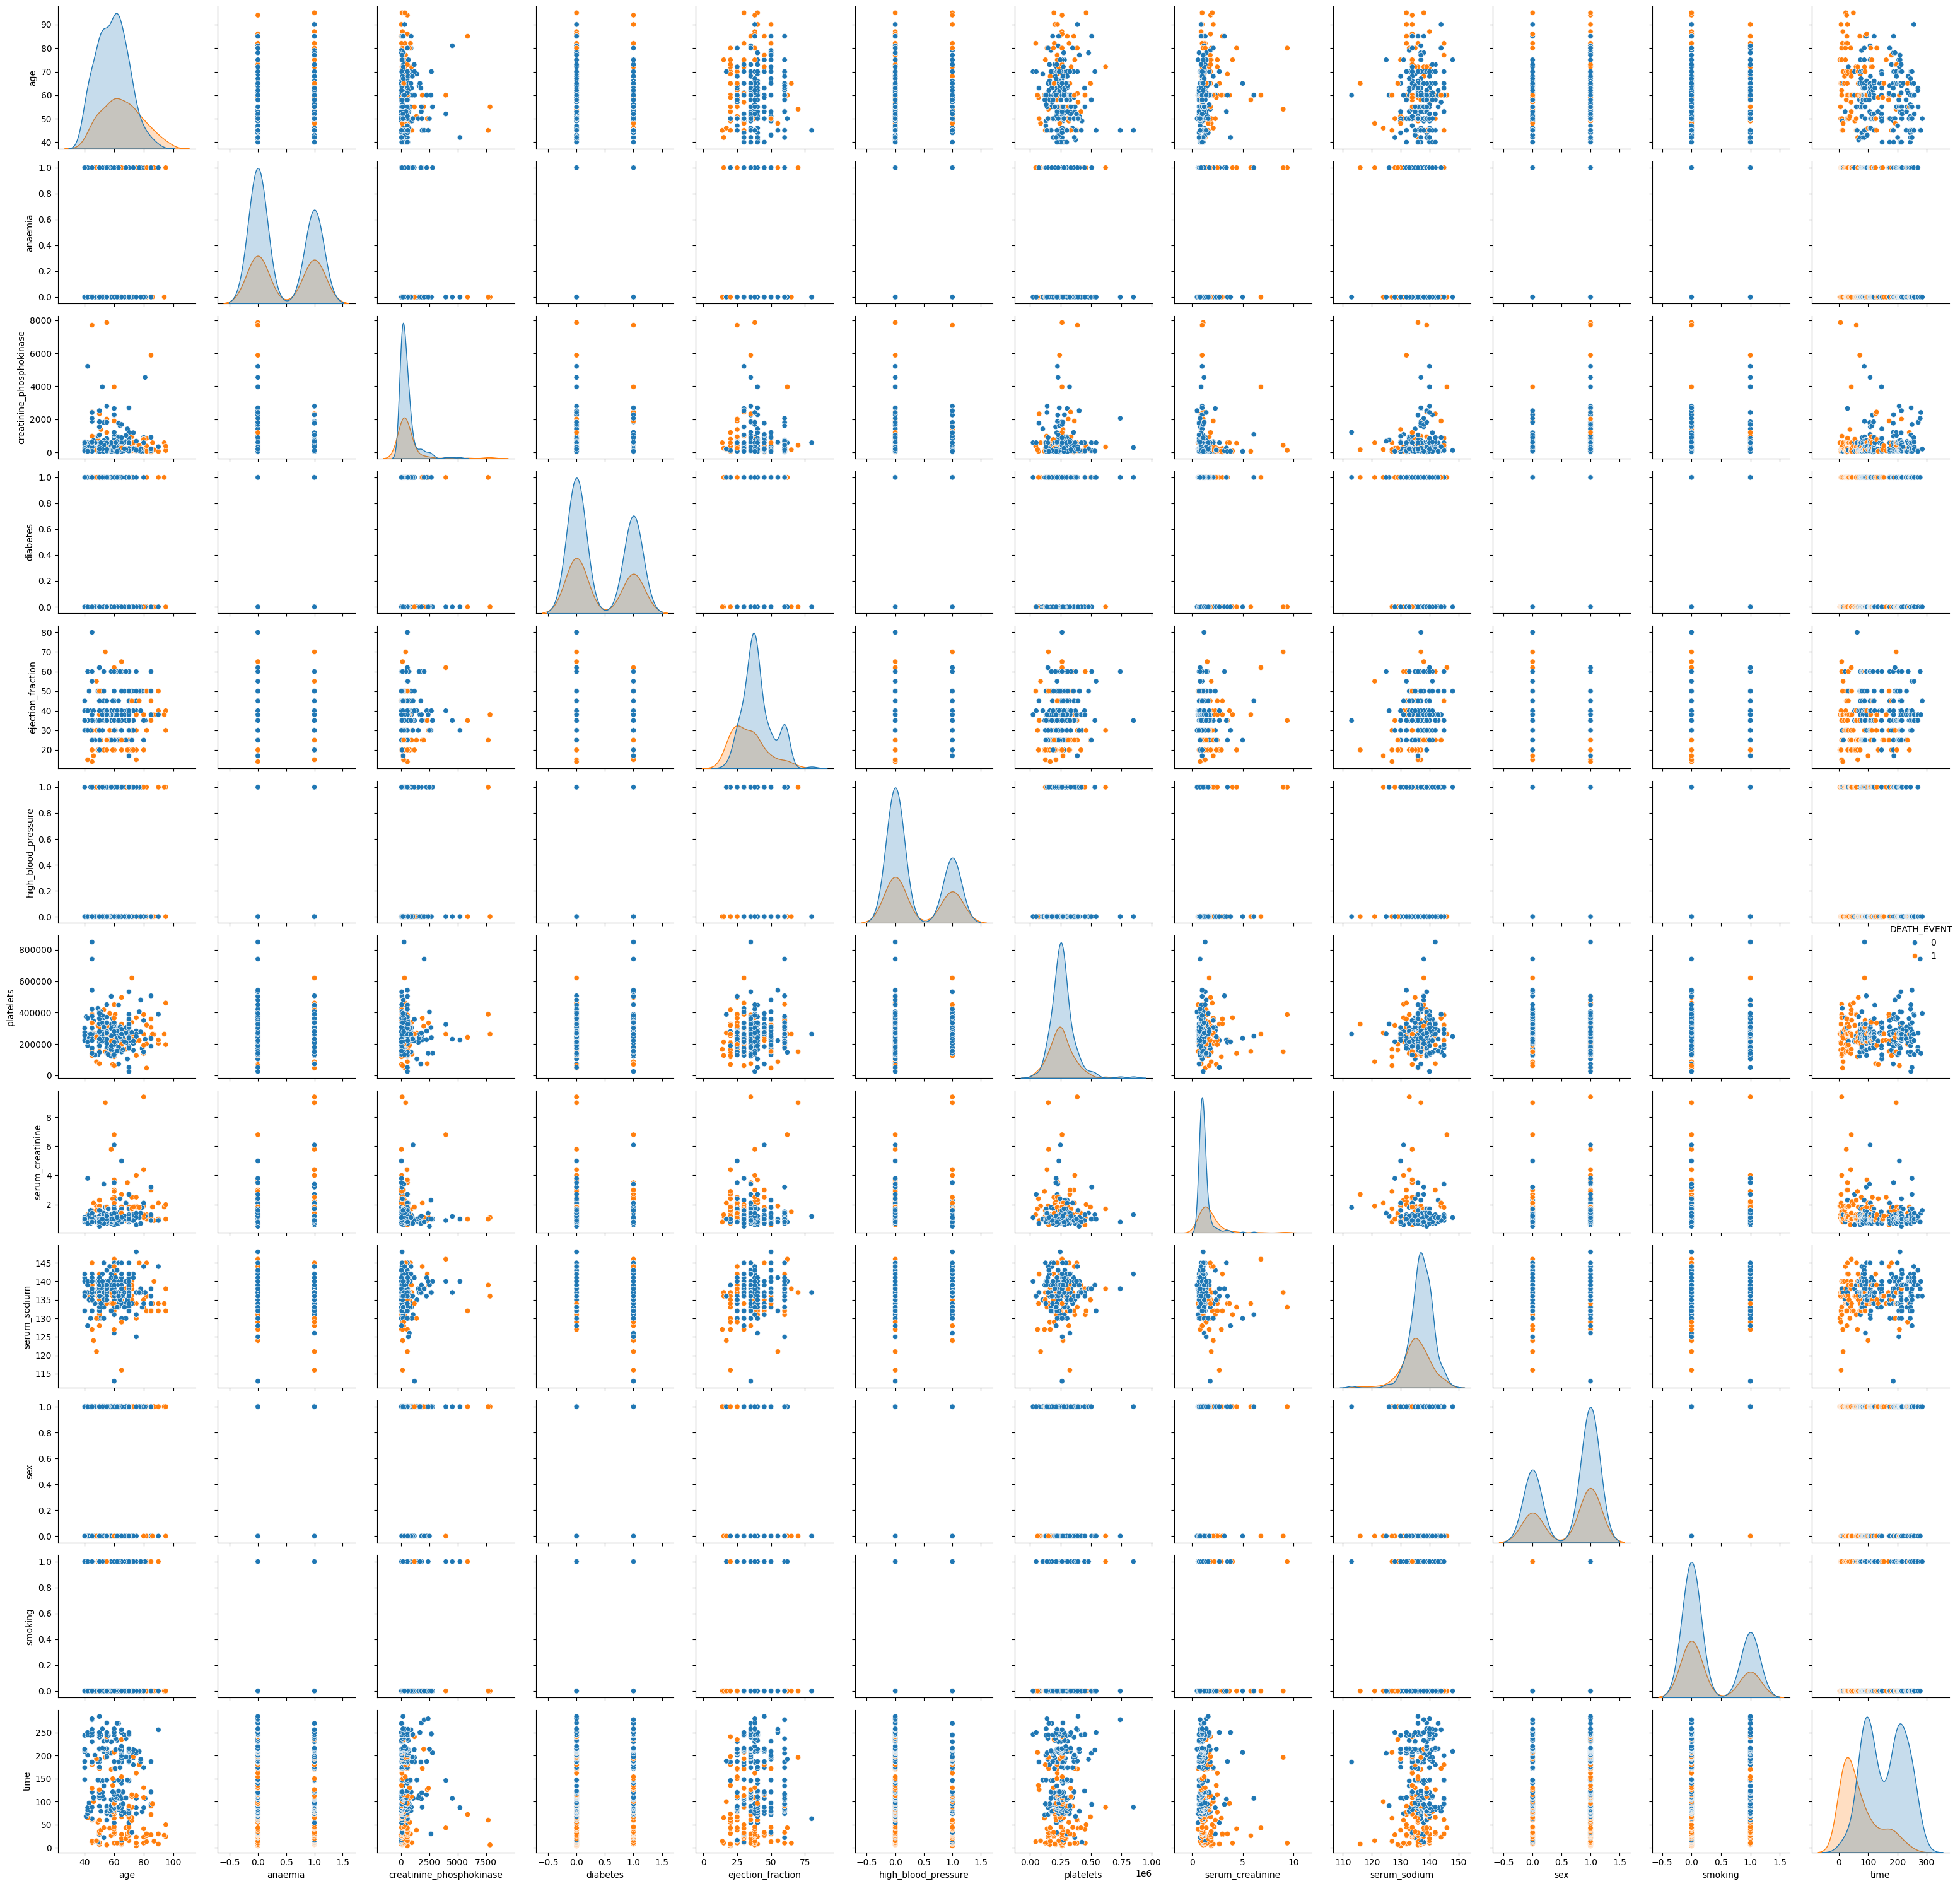

In [46]:
plt.figure(figsize=(15,10))
sns.pairplot(df , hue = 'DEATH_EVENT')
plt.tight_layout()
plt.plot()

In [60]:
# Feature scaling and PCA Implementation
X = df.drop('DEATH_EVENT', axis='columns')
y = df['DEATH_EVENT']

scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

In [49]:
# Data visualization after PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
df_pca = pd.DataFrame(data=X_pca, columns=['PCA1', 'PCA2'])
df_pca['DEATH_EVENT'] = y

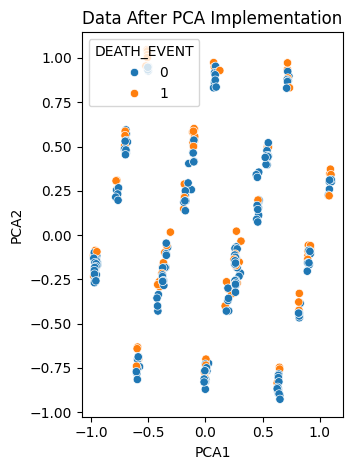

In [50]:
plt.subplot(1, 2, 2)
sns.scatterplot(x='PCA1', y='PCA2', hue='DEATH_EVENT', data=df_pca)
plt.title('Data After PCA Implementation')
plt.tight_layout()
plt.show()

In [51]:
# Split the data into training, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp)

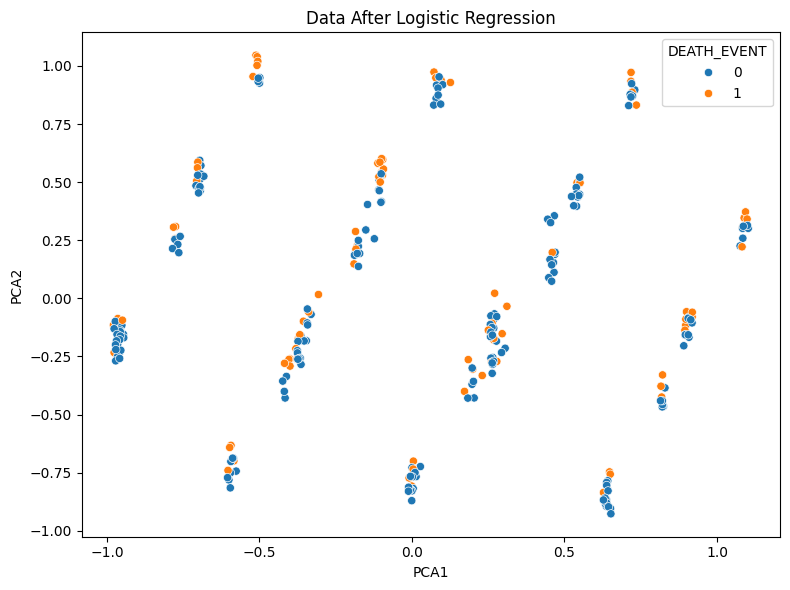

In [58]:
# Logistic Regression
lr_params = {'penalty': ['l1', 'l2'], 'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000], 'max_iter': [100, 500, 1000]}
lr_grid = GridSearchCV(LogisticRegression(), lr_params, cv=5)
lr_grid.fit(X_train, y_train)

lr_model = lr_grid.best_estimator_

# Data visualization after Logistic Regression
plt.figure(figsize=(8, 6))
sns.scatterplot(x='PCA1', y='PCA2', hue='DEATH_EVENT', data=df_pca)
plt.title('Data After Logistic Regression')
plt.tight_layout()
plt.show()

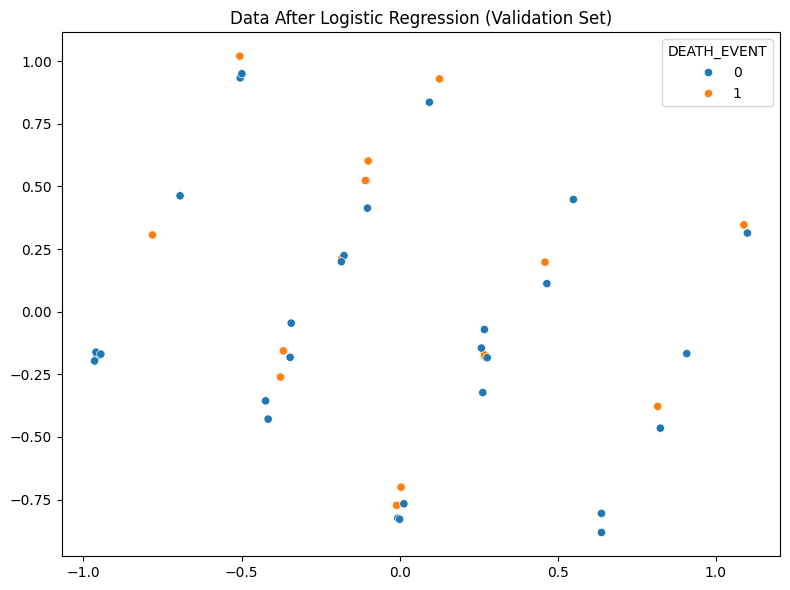

In [61]:
# Logistic Regression with Hyperparameter tuning and Model Optimization
lr_params = {'penalty': ['l1', 'l2'], 'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000], 'max_iter': [100, 500, 1000]}
lr_grid = GridSearchCV(LogisticRegression(), lr_params, cv=5)
lr_grid.fit(X_train, y_train)

lr_model = lr_grid.best_estimator_

# Data visualization after Logistic Regression
X_val_scaled = scaler.transform(X_val)
X_val_pca = pca.transform(X_val_scaled)

plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_val_pca[:, 0], y=X_val_pca[:, 1], hue=y_val)
plt.title('Data After Logistic Regression (Validation Set)')
plt.tight_layout()
plt.show()

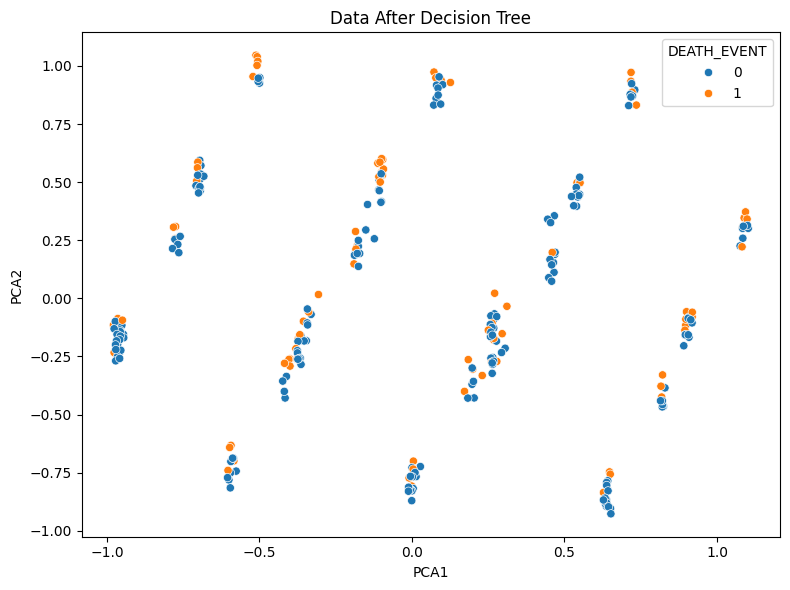

In [53]:
# Decision Tree
dt_params = {'max_depth': [None, 10, 20, 30, 40, 50], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4]}
dt_grid = GridSearchCV(DecisionTreeClassifier(), dt_params, cv=5)
dt_grid.fit(X_train, y_train)

dt_model = dt_grid.best_estimator_

# Data visualization after Decision Tree
plt.figure(figsize=(8, 6))
sns.scatterplot(x='PCA1', y='PCA2', hue='DEATH_EVENT', data=df_pca)
plt.title('Data After Decision Tree')
plt.tight_layout()
plt.show()

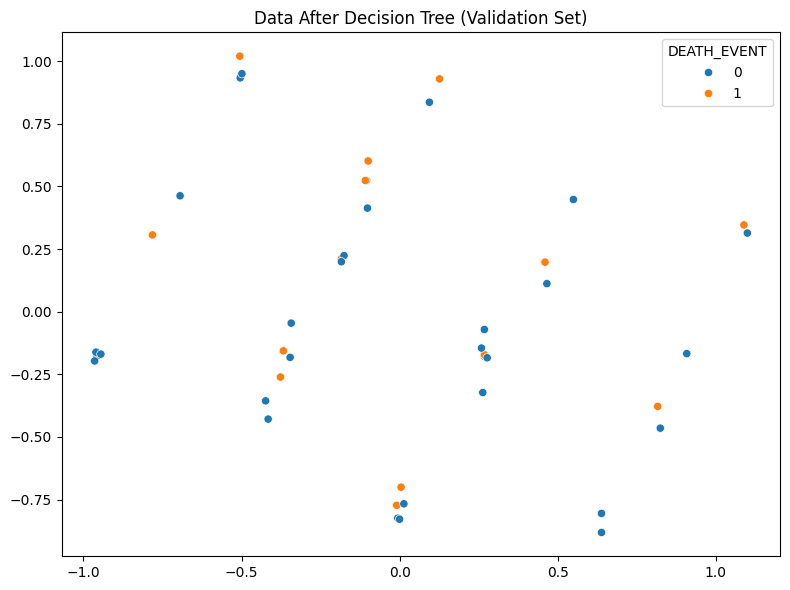

In [62]:
#Decision Tree with Hyperparameter tuning and Model Optimization
dt_params = {'max_depth': [None, 10, 20, 30, 40, 50], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4]}
dt_grid = GridSearchCV(DecisionTreeClassifier(), dt_params, cv=5)
dt_grid.fit(X_train, y_train)

dt_model = dt_grid.best_estimator_

# Data visualization after Decision Tree
X_val_pca = pca.transform(X_val_scaled)

plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_val_pca[:, 0], y=X_val_pca[:, 1], hue=y_val)
plt.title('Data After Decision Tree (Validation Set)')
plt.tight_layout()
plt.show()

In [59]:
# Model evaluation on validation set
models = {'Logistic Regression': lr_model, 'Decision Tree': dt_model}
for name, model in models.items():
    y_val_pred = model.predict(X_val_scaled)
    print(f"Model: {name}")
    print("Confusion Matrix:")
    print(confusion_matrix(y_val, y_val_pred))
    print("Classification Report:")
    print(classification_report(y_val, y_val_pred))
    print(f"Accuracy: {accuracy_score(y_val, y_val_pred)}")
    print("\n")

Model: Logistic Regression
Confusion Matrix:
[[25  5]
 [ 3 12]]
Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.83      0.86        30
           1       0.71      0.80      0.75        15

    accuracy                           0.82        45
   macro avg       0.80      0.82      0.81        45
weighted avg       0.83      0.82      0.82        45

Accuracy: 0.8222222222222222


Model: Decision Tree
Confusion Matrix:
[[ 0 30]
 [ 0 15]]
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        30
           1       0.33      1.00      0.50        15

    accuracy                           0.33        45
   macro avg       0.17      0.50      0.25        45
weighted avg       0.11      0.33      0.17        45

Accuracy: 0.3333333333333333


